In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
url='image_data/'
df_data_covid_19 = pd.read_csv('data/preprocessing.csv')
df_data_covid_19

,title,text,source,label
0,due recent outbreak coronavirus covid world he...,need add water drugs vaccines ready administer...,coronavirusmedicalkit com,fake
1,basic protective measures new coronavirus,stay aware latest information covid outbreak a...,ww int emergencies diseases novel coronavirus ...,true
2,exposing sun temperatures higher c degrees pre...,catch covid matter sunny hot weather countries...,ww int emergencies diseases novel coronavirus ...,true
3,able hold breath seconds without coughing feel...,common symptoms covid dry cough tiredness feve...,ww int emergencies diseases novel coronavirus ...,true
4,drinking alcohol protect covid dangerous,frequent excessive alcohol consumption increas...,ww int emergencies diseases novel coronavirus ...,true
...,...,...,...,...
1054,could power sun slow coronavirus,study suggests ultraviolet rays could slow vir...,ww nytimes com,true
1055,key evidence coronavirus spread flawed public ...,last week medical journal reported business tr...,ww nytimes com,true
1056,summer heat may diminish coronavirus strength,new report sent white house science adviser sa...,ww nytimes com,true
1057,long vaccine really take,vaccine would ultimate weapon coronavirus best...,ww nytimes com,true


In [4]:
def merge_3_columns(df):
    df['title_text_source'] = df['title'] + ' ' + df['text'] + ' ' + df['source']
    return df.dropna()

df_data_covid_19=merge_3_columns(df_data_covid_19)

In [5]:
df_data_covid_19.head(10)

,title,text,source,label,title_text_source
0,due recent outbreak coronavirus covid world he...,need add water drugs vaccines ready administer...,coronavirusmedicalkit com,fake,due recent outbreak coronavirus covid world he...
1,basic protective measures new coronavirus,stay aware latest information covid outbreak a...,ww int emergencies diseases novel coronavirus ...,true,basic protective measures new coronavirus stay...
2,exposing sun temperatures higher c degrees pre...,catch covid matter sunny hot weather countries...,ww int emergencies diseases novel coronavirus ...,true,exposing sun temperatures higher c degrees pre...
3,able hold breath seconds without coughing feel...,common symptoms covid dry cough tiredness feve...,ww int emergencies diseases novel coronavirus ...,true,able hold breath seconds without coughing feel...
4,drinking alcohol protect covid dangerous,frequent excessive alcohol consumption increas...,ww int emergencies diseases novel coronavirus ...,true,drinking alcohol protect covid dangerous frequ...
5,covid virus transmitted areas hot humid climates,evidence far covid virus transmitted areas inc...,ww int emergencies diseases novel coronavirus ...,true,covid virus transmitted areas hot humid climat...
6,cold weather snow kill new coronavirus,reason believe cold weather kill new coronavir...,ww int emergencies diseases novel coronavirus ...,true,cold weather snow kill new coronavirus reason ...
7,taking hot bath prevent new coronavirus disease,taking hot bath prevent catching covid normal ...,ww int emergencies diseases novel coronavirus ...,true,taking hot bath prevent new coronavirus diseas...
8,new coronavirus transmitted mosquito bites,date information evidence suggest new coronavi...,ww int emergencies diseases novel coronavirus ...,true,new coronavirus transmitted mosquito bites dat...
9,hand dryers effective killing new coronavirus,hand dryers effective killing ncov protect new...,ww int emergencies diseases novel coronavirus ...,true,hand dryers effective killing new coronavirus ...


In [6]:
df_data_covid_19.isnull().any()

title                False
text                 False
source               False
label                False
title_text_source    False
dtype: bool

## TF-IDF

In [7]:
def tokenizer_porter(text):
    porter = PorterStemmer()
    return [porter.stem(word) for word in text.split()]

In [8]:
def tf_idf_vectors(df):
    tfidf = TfidfVectorizer(strip_accents=None,
                            lowercase=False,
                            preprocessor=None,
                            tokenizer=tokenizer_porter,
                            use_idf=True,
                            norm='l2',
                            smooth_idf=True)
    
    X = tfidf.fit_transform(df['title_text_source'])
    y = df_data_covid_19.label.values
    return X, y,tfidf

In [9]:
X,y,tfidf=tf_idf_vectors(df_data_covid_19)

## Save/ Show model

In [10]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.datasets import make_classification
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [11]:
def save_model(clf_,filename):
    model = open('data/'+filename+'.sav', 'wb')
    pickle.dump(clf_, model)
    model.close()

In [12]:
def show_model_evaluation(filename, X_test, y_test):
    # get modle
    clf_= pickle.load(open('data/'+filename+'.sav', 'rb'))
    # Predicting the Test set results
    predictions = clf_.predict(X_test)
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    
    precision, recall, fscore, support = score(y_test, predictions)
    #print('precision train-test: {}'.format(precision))
    #print('recall train-test: {}'.format(recall))
    #print('fscore train-test: {}'.format(fscore))
    #print('support: {}'.format(support))
    
    
    print("Accuracy Classifier: {}%".format(round(accuracy_score(y_test, predictions)*100,2)))
    #print("\nConfusion Matrix :\n")
    #print(confusion_matrix(y_test, predictions))
    print("\nClassification Report:\n")
    print(classification_report(y_test, predictions))

    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(filename)
    plt.savefig(url+filename+'.png')
    plt.show()

## naïve_bayes_classifier

In [14]:
def naïve_bayes_classifier(df,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=11) 
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    print('accuracy on train data: ', classifier.score(X_train, y_train))
    print('accuracy on test data: ', classifier.score(X_test, y_test))
    
    # save model
    save_model(classifier,'naïve_bayes_model')
    return X_test, y_test

In [15]:
X_test, y_test=naïve_bayes_classifier(df_data_covid_19,X,y)

accuracy on train data:  0.9385342789598109
accuracy on test data:  0.8962264150943396


Accuracy Classifier: 89.62%

Classification Report:

              precision    recall  f1-score   support

        fake       0.91      0.85      0.88        95
        true       0.89      0.93      0.91       117

    accuracy                           0.90       212
   macro avg       0.90      0.89      0.89       212
weighted avg       0.90      0.90      0.90       212



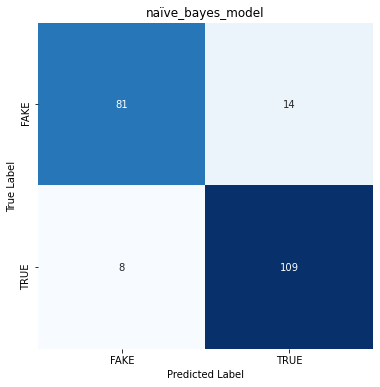

In [16]:
show_model_evaluation('naïve_bayes_model',X_test, y_test)

## logistic regression

In [17]:
def logistic_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=False)
    classifier=LogisticRegressionCV(cv=5,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=300).fit(X_train,y_train)
    print('accuracy on train data: ', classifier.score(X_train, y_train))
    print('accuracy on test data: ', classifier.score(X_test, y_test))
    
    # save model
    save_model(classifier,'logistic_regression_model')
    return X_test, y_test

In [18]:
X_test, y_test=logistic_regression(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.1s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


accuracy on train data:  1.0
accuracy on test data:  0.9339622641509434


Accuracy Classifier: 93.4%

Classification Report:

              precision    recall  f1-score   support

        fake       0.92      0.92      0.92        91
        true       0.94      0.94      0.94       121

    accuracy                           0.93       212
   macro avg       0.93      0.93      0.93       212
weighted avg       0.93      0.93      0.93       212



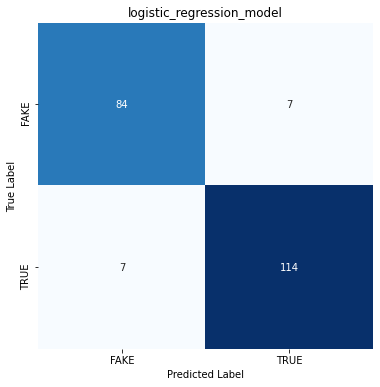

In [19]:
show_model_evaluation('logistic_regression_model',X_test, y_test)

## Decision tree classifier

In [20]:
def decision_tree_classifier(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=11)
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    print('accuracy on train data: ', classifier.score(X_train, y_train))
    print('accuracy on test data: ', classifier.score(X_test, y_test))

    # save model
    save_model(classifier,'decision_tree_classifier')
    return X_test, y_test

In [21]:
X_test, y_test=decision_tree_classifier(X,y)

accuracy on train data:  1.0
accuracy on test data:  0.8349056603773585


Accuracy Classifier: 83.49%

Classification Report:

              precision    recall  f1-score   support

        fake       0.79      0.86      0.82        95
        true       0.88      0.81      0.84       117

    accuracy                           0.83       212
   macro avg       0.83      0.84      0.83       212
weighted avg       0.84      0.83      0.84       212



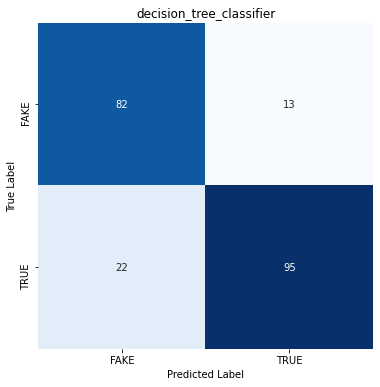

In [22]:
show_model_evaluation('decision_tree_classifier',X_test, y_test)

## Random forest

In [23]:
def random_forest_classifier(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=11)
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    print('accuracy on train data: ', classifier.score(X_train, y_train))
    print('accuracy on test data: ', classifier.score(X_test, y_test))
    
    # save model
    save_model(classifier,'random_forest_classifier')
    return X_test, y_test

In [24]:
X_test, y_test=random_forest_classifier(X,y)

accuracy on train data:  0.9976359338061466
accuracy on test data:  0.8490566037735849


Accuracy Classifier: 84.91%

Classification Report:

              precision    recall  f1-score   support

        fake       0.77      0.94      0.85        95
        true       0.94      0.78      0.85       117

    accuracy                           0.85       212
   macro avg       0.86      0.86      0.85       212
weighted avg       0.86      0.85      0.85       212



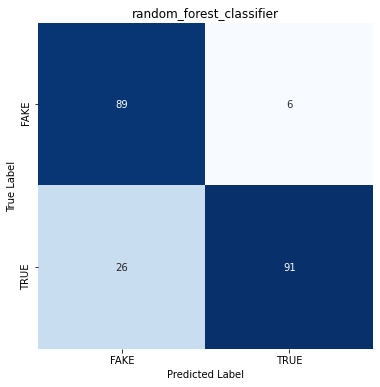

In [25]:
show_model_evaluation('random_forest_classifier',X_test, y_test)

## KNeighbors_classifier

In [26]:
def knn(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=11)
    classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    print('accuracy on train data: ', classifier.score(X_train, y_train))
    print('accuracy on test data: ', classifier.score(X_test, y_test))

    # save model
    save_model(classifier,'KNN')
    return X_test, y_test

In [27]:
X_test, y_test=knn(X,y)

accuracy on train data:  0.933806146572104
accuracy on test data:  0.9056603773584906


Accuracy Classifier: 90.57%

Classification Report:

              precision    recall  f1-score   support

        fake       0.88      0.92      0.90        95
        true       0.93      0.90      0.91       117

    accuracy                           0.91       212
   macro avg       0.90      0.91      0.90       212
weighted avg       0.91      0.91      0.91       212



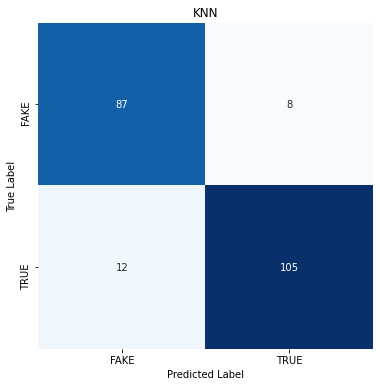

In [28]:
show_model_evaluation('KNN',X_test, y_test)

## SVC

In [44]:
def svc(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=11)
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    print('accuracy on train data: ', classifier.score(X_train, y_train))
    print('accuracy on test data: ', classifier.score(X_test, y_test))
    
    # save model
    save_model(classifier,'SVC')
    return X_test, y_test, classifier

In [45]:
X_test, y_test,classifier=svc(X,y)

accuracy on train data:  0.991725768321513
accuracy on test data:  0.9433962264150944


Accuracy Classifier: 94.34%

Classification Report:

              precision    recall  f1-score   support

        fake       0.94      0.94      0.94        95
        true       0.95      0.95      0.95       117

    accuracy                           0.94       212
   macro avg       0.94      0.94      0.94       212
weighted avg       0.94      0.94      0.94       212



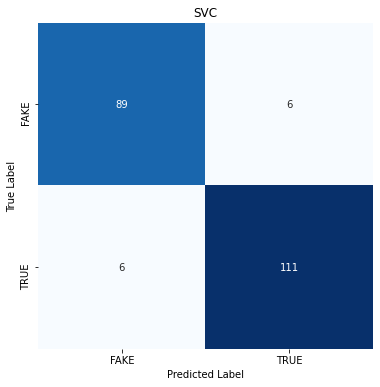

In [47]:
show_model_evaluation('SVC',X_test, y_test)